# AI

Steven Pinker - How the Mind Works (1997)
 
 "Intelligence, then, is the ability to attain goals in the face of obstacles by means of decisions based on rational (truth-obeying) rules."
 
 
 behave \textbf{rationally} given the available resources (time, computational power, sensors\dots)
 
 autonomously made the "best" decision to accomplish a given goal or to maximize payoff.

# Agent 

Act rationally

Always make the "best" decision given the available resources (knowledge, time, computational power and memory)

Best: maximize certain performance measure(s), usually represented as a utility function. 

System that behave rationally; system that accomplish what it is supposed to do, well, given the available resources. 

An agent is a computer program that

- gathers information about an environment, and
- takes actions autonomously based on that information

# Environment

Discrete vs continuous

- Do the sensors return integer or Real numbers?

Deterministic vs non-deterministic

- Does the agent know exactly which state it will be after performing a action at a particular state?

Fully observable or partially observable

- can the agent see the whole environment at one time?

Statis or dynamics

- is  the environment changing as the agent think?




## Components

A: action space

- the set of all actions the agent can do

O: percept space

- the set of all things the agent can perceieve in the world

S: state space

- internal state of the agent & the environment that matters for the interaction between the agent & and the environment

Wolrd dynamics: $T: S \times A \rightarrow S$

Perception function: $Z: S \rightarrow O$


U Utility function: A function that assings a value to each states, to indicate the desirability of being in such a state with respect to the agent's task.

------

## Design an agent

A

O

S

$T: S \times A \rightarrow S$

$Z: S \rightarrow O$

$U: S \rightarrow$ real number


## In this project

A: 

- 0: steer left
- 1: keep straight
- 2: steer right

O:

$(s_0, s_1, s_2, s_3, s_4) \in \mathbb{R}^5 $

such that $ 0 \leq s_i \leq 50 $ for $ 0 \leq i \leq 4 $

S: 

$(s_0, s_1, s_2, s_3, s_4) \in \mathbb{R}^5 $

such that $ 0 \leq s_i \leq 1 $ for $ 0 \leq i \leq 4 $

Z: resscale so that the sensor input is from 0 to 1

Utility function

- $-500$ if crashed
- $ -50* (\min(s_0, s_1, s_2, s_3, s_4) - 1 )^4 + 50$


## Goal 

find a mapping sequences of percepts to action P* -> that maximizes the utility function. 

given the sequences of percepts it has seen so far, what should the agent do next, so that the utility function can be maximized

## Types of machine learning

supervised learning 

unsupervised learning

reinforcement learning 

# Markov Decision Processes (MDPs)

A framework to find the best sequence of actions to perform when the outcome of each action is non-deterministic.

The non-determinism must be $1^{st}$ order Markov.

$1^{st}$ order Markov means given the present state, the future states are independent from the past states.

$$P(s^{t+1} | s^t, a^t) = P(s^{t+1} | s^t, a^t, s^{t-1}, a^{t-1}, \dots, s^1, a^1, s^0)$$

MDP Problem is formally defnied as 4-tuples $(S, A, T, R)$:

$S$ State Space

$A$ Action Space

$T$ transition function 

$$T(s, a, s') = P(S_{t+1} = s' | S_t = s, A_t = a)$$

R reward function

$$R(s, a)$$

## policy ($\pi$)

Policy = strategy

- a mapping from states to actions $\pi: S \rightarrow A$.
- meaning for any states s in S, $\pi(s)$ will tell us what action the agent should perform. 

Optimal policy ($\pi*$)

Meaning for any state s in S, $\pi*(s)$ will tell us what is the best action the agent should perform. 


## Goal

The goal of an MDP agent is to perform actions so as to gather the highest total reward possible. 


# Exploration vs Exploitation 

exploit: the knowledge that it has found for the current state s by doing one of the action a that maximizes Q(s,a)

explore in order to build a better estimate of the optimal Q-function. That is, it should select a different action from the one that is currently thinks is best. 

## $\epsilon$-greedy 

select the greedy action all but $\epsilon$ of the time 

select random action $\epsilon$ of the time, where $0 \leq \epsilon \leq 1$



# Q-learning 

Reinforecemnt learning : learn by doing

$Q*(s,a)$ is the expected value (cumulative discounted reward) of doing action $a$ in state $s$ and the following the optimal policy. 

Q-learning uses temporal differences to estimate the value of $Q*(s,a)$

an experience is a tuple (s, a, r, s')

An experience (s, a, r, s') provides one data point for the value Q(s,a). 

$Q(s, a) \leftarrow (1-\alpha) Q(s,a) + \alpha(r + \gamma \max_{a'}Q(s',a'))$


Temporal Difference is an approach to learn how to predict a quanity that depents on future value of a given signal


https://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_td.html


# The curse of dimentionality

Q-matrix state by action

$Q[s, a]$ repesent the estimated Q value at state s performing action a. 

# Neural network and Q-learing

https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf

# Neural Network

# Experienced Replay

More efficient use of previous experience, by learning with it multiple times. This is key when gaining real-world experience is costly, you can get full use of it. The Q-learning updates are incremental and do not converge quickly, so multiple passes with the same data is beneficial, especially when there is low variance in immediate outcomes (reward, next state) given the same state, action pair.

Better convergence behaviour when training a function approximator. Partly this is because the data is more like i.i.d. data assumed in most supervised learning convergence proofs.


# Implementation


# References

http://robotics.itee.uq.edu.au/~ai/doku.php/wiki/schedule

http://artint.info/html/ArtInt_265.html

In [10]:
import numpy as np
import matplotlib.pyplot as plt

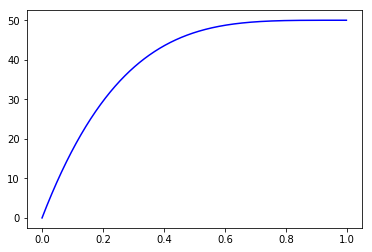

In [33]:
def r(x, coeff = 50, power = 3):
    return -50*(x-1)**4 + 50

x = np.arange(0,1, 0.001)

plt.plot(x, r(x), '-b')
# plt.ylim(0,55)
plt.show()

In [ ]:
def g(x, coeff = 50, power = 3):
    return coeff * x ** power

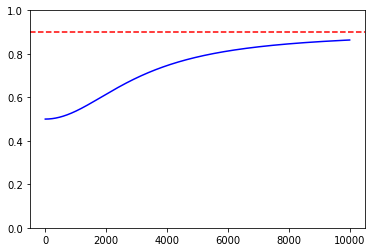

In [112]:
g = lambda x : 0.4 * (x ** 2 + 1) /  (x ** 2 + 10**7) + 0.5

x = np.arange(0, 10000, 0.1)

plt.plot(x, g(x), '-b')

plt.axhline(y=0.9, ls = '--', color='r')

plt.ylim(0,1)
plt.show()

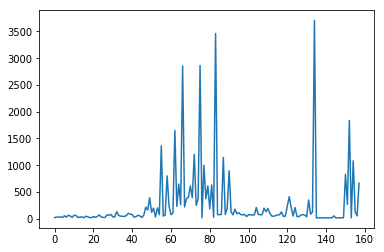

In [26]:
loop = open('data/loop.txt')
loop_data = loop.read()
loop_data = loop_data.split('\t')

plt.plot([int(i) for i in loop_data[:-1]])
plt.show()

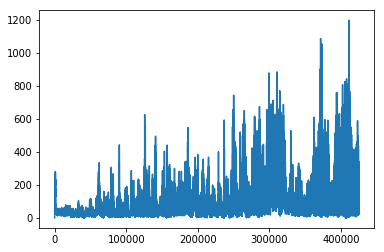

In [25]:
brain = open('data/brain_data')
brain_data = brain.read()
brain_data = brain_data.split('\t')

plt.plot([float(i) for i in brain_data[:-1]])
plt.show()